<a href="https://colab.research.google.com/github/imy0ung/AI_Basic_Study/blob/main/Pytorch1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Pytorch**

1. Tensor
2. Dataset
3. Transform

In [ ]:
import torch

# **Tensor**


1.   텐서는 배열이나 행렬과 매우 유사한 자료구조
2.   Pytorch에서는 텐서를 사용하여 모델의 입력과 모델의 매개 변수들을 부호화함
3.   numpy의 ndarray와 유사. 그러나 텐서는 하드웨어 가속기에서 실행할 수 있음
4.   자동 미분의 최적화



In [ ]:
import numpy as np

data = [[1,2],[3,4]]
x_data = torch.tensor(data)
print(x_data, type(x_data))

tensor([[1, 2],
        [3, 4]]) <class 'torch.Tensor'>


###**Tensor 기초**

In [ ]:
#1. ndarray와 tensor사이의 변환이 자유롭다.
np_array = np.array(data)
x_np = torch.from_numpy(np_array)
type(x_np)

torch.Tensor

In [ ]:
#2. 텐서의 차원은 튜플로 정의한다.

shape = (2,3,)
rand_tensor = torch.rand(shape)
ones_tensor = torch.ones(shape)
zeros_tensor = torch.zeros(shape)

print(f"rand_tensor: {rand_tensor}")
print(f"ones_tensor: {ones_tensor}")
print(f"zeros_tensor: {zeros_tensor}")

rand_tensor: tensor([[0.6858, 0.9880, 0.5572],
        [0.2245, 0.2915, 0.3781]])
ones_tensor: tensor([[1., 1., 1.],
        [1., 1., 1.]])
zeros_tensor: tensor([[0., 0., 0.],
        [0., 0., 0.]])


In [ ]:
#3. 텐서의 속성
tensor = torch.rand(3,4)
print(f"Shape of tensor: {tensor.shape}")
print(f"Datatype of tensor: {tensor.dtype}")
print(f"Device of tensor: {tensor.device}")

Shape of tensor: torch.Size([3, 4])
Datatype of tensor: torch.float32
Device of tensor: cpu


### **Tensor Operation**

1. 기본적으로 텐서는 CPU에 생성됨.
2. 텐서 간 연산은 GPU가 훨씬 빠르기 때문에, 텐서를 GPU에 할당해서 사용
3. 그러나 장치들 간 큰 텐서들을 복사하는 것은 시간과 메모리 측면에서 비용이 많이 든다는 것을 기억해야함!!

In [ ]:
# GPU 메모리가 존재하면 텐서를 이동합니다.
if torch.cuda.is_available() :
  tensor = tensor.to("cuda")

In [ ]:
#1. tensor : numpy와 상당히 유사
tensor = torch.ones(4,4)
print(f"First row: {tensor[0]}")
print(f"First column : {tensor[:,0]}")
print(f"Last column : {tensor[...,-1]}")
tensor[:,1] = 0
print(tensor)

First row: tensor([1., 1., 1., 1.])
First column : tensor([1., 1., 1., 1.])
Last column : tensor([1., 1., 1., 1.])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


In [ ]:
#2. tensor 합치기
t1 = torch.cat([tensor, tensor, tensor], dim = 1) # dim = 0은 행방향
print(t1)

tensor([[1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.],
        [1., 0., 1., 1., 1., 0., 1., 1., 1., 0., 1., 1.]])


In [ ]:
#3. tensor 연산
y1 = tensor @ tensor.T # tensor의 matrix 곱
y2 = tensor.matmul(tensor.T)
print(y1, y2, sep = '\n')

z1 = tensor * tensor # element - wise product
z2 = tensor.mul(tensor)
print(z1, z2, sep = '\n')

z3 = torch.rand_like(tensor) # _like는 해당 tensor와 shape와 dtype을 유지
torch.matmul(tensor, tensor.T, out = z3)

tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])
tensor([[1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.],
        [1., 0., 1., 1.]])


tensor([[3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.],
        [3., 3., 3., 3.]])

In [ ]:
#4. tensor의 모든 값이 하나로 모여서 하나의 텐서가 될 경우, 형변환 가능
agg = tensor.sum()
print(agg) # 하나의 텐서
agg_item = agg.item() # 하나의 텐서를 item을 통해 python의 숫자로 바꾸어줌
print(agg_item, type(agg_item))

tensor(12.)
12.0 <class 'float'>


In [ ]:
#5. _ 바꿔치기(in-place) 연산자
print(f"{tensor}\n")
tensor.add_(5) # _ 연산자는 바꿔치기 연산자로, tensor에 바로 저장
print(tensor)

tensor([[6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.],
        [6., 5., 6., 6.]])

tensor([[11., 10., 11., 11.],
        [11., 10., 11., 11.],
        [11., 10., 11., 11.],
        [11., 10., 11., 11.]])


### **Tensor - numpy**

CPU 상의 텐서와 Numpy 배열은 메모리 공간을 공유하기 때문에, 하나를 변경하면 다른 하나도 변경된다.

In [ ]:
#1. tensor to numpy
t = torch.ones(5)
print(f"t: {t}")
n = t.numpy()
print(f"n: {n}")

t: tensor([1., 1., 1., 1., 1.])
n: [1. 1. 1. 1. 1.]


In [ ]:
#2. tensor-numpy는 같은 메모리를 공유하기 때문에, 변경 사항이 numpy배열에 반영된다.
t.add_(1)
print(f"t:{t}")
print(f"t:{n}")

t:tensor([3., 3., 3., 3., 3.])
t:[3. 3. 3. 3. 3.]


In [ ]:
#3. numpy to tensor
n = np.ones(5)
# t = torch.tensor(n) # 새로운 메모리 공간에 데이터를 복사함
t = torch.from_numpy(n) # 같은 메모리 공간을 사용
print(t)

tensor([1., 1., 1., 1., 1.], dtype=torch.float64)


In [ ]:
np.add(n,1,out=n)
print(f"t:{t}")
print(f"t:{n}")

t:tensor([2., 2., 2., 2., 2.], dtype=torch.float64)
t:[2. 2. 2. 2. 2.]


# **DATASET과 DATALOADER**

1. torch.utils.data.DataLoader : Dataset을 샘플에 쉽게 접근할 수 있도록 iterator로 감쌈
2. torch.utils.data.Dataset : 샘플과 정답을 저장

### **mnist**

In [3]:
import torch
from torch.utils.data import Dataset
from torchvision import datasets
from torchvision.transforms import ToTensor
import matplotlib.pyplot as plt


training_data = datasets.FashionMNIST(
    root = "data",
    train = True,
    download = True,
    transform = ToTensor()
)

test_data = datasets.FashionMNIST(
    root = "data",
    train = False,
    download = True,
    transform = ToTensor()
)

100%|██████████| 26421880/26421880 [00:01<00:00, 14705287.17it/s]


Extracting data/FashionMNIST/raw/train-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 29515/29515 [00:00<00:00, 228462.43it/s]


Extracting data/FashionMNIST/raw/train-labels-idx1-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 4422102/4422102 [00:01<00:00, 4245288.53it/s]


Extracting data/FashionMNIST/raw/t10k-images-idx3-ubyte.gz to data/FashionMNIST/raw



100%|██████████| 5148/5148 [00:00<00:00, 17357135.85it/s]

Extracting data/FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to data/FashionMNIST/raw



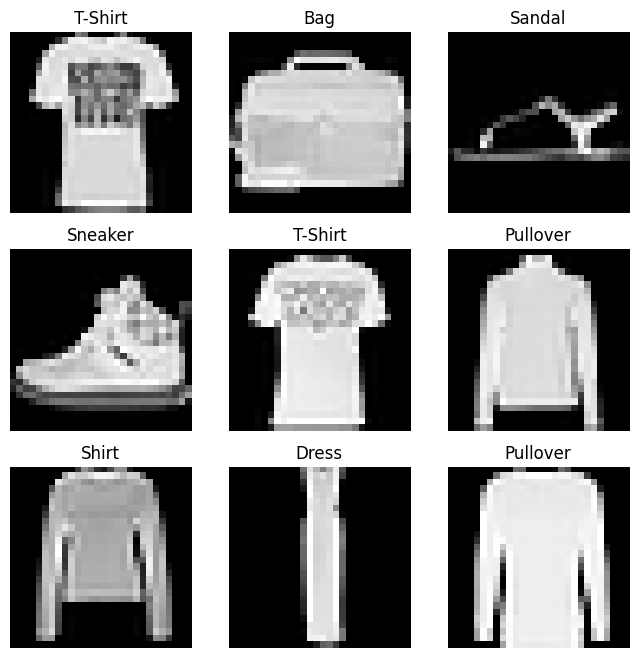

In [ ]:
#1. DATASET 순회하고 화면에 띄워보기

labels_map = {
    0: "T-Shirt",
    1: "Trouser",
    2: "Pullover",
    3: "Dress",
    4: "Coat",
    5: "Sandal",
    6: "Shirt",
    7: "Sneaker",
    8: "Bag",
    9: "Ankle Boot",
}

figure = plt.figure(figsize=(8,8))
cols, rows = 3, 3

for i in range(1, cols*rows+1) :
  sample_idx = torch.randint(len(training_data),size = (1,)).item() #random으로 하나를 뽑고
  img,label =  training_data[sample_idx] # training_data에 접근
  figure.add_subplot(rows,cols,i) # 3x3 matrix에 i번째에서 작업을 하겠다/
  plt.title(labels_map[label]) # title
  plt.axis("off") # axis
  plt.imshow(img.squeeze(),cmap="gray") # 이미지 시각화, squeeze는 불필요한 차원을 제거해서 2d배열로 만들어줌
plt.show()

### **사용자 정의 데이터셋 만들기**
1. 사용자 정의 dataset클래스는 반드시 3개의 함수가 필요
2. __init__, __len__, __getitem__

In [ ]:
import os
import pandas as pd
from torchvision.io import read_image

# fashion mnist를 예로 들어보면, 이미지는 img_dir에 정답은 annotation_file에 csv파일에 별도로 저장됩니다.

class CustomImageDataset(Dataset) :
  def __init__(self, annotations_file, img_dir, transform = None, target_transform = None) :
    # init함수는 이미,주석파일을 초기화합니다.
    # annotation_file, img_dir, transform : feature 전처리, target_transform : label 전처리
    self.img_labels = pd.read_csv(annotations_file)
    self.img_dir = img_dir
    self.transform = transform
    self.target_transform = target_transform

  def __len__(self) :\
  # __len__ 함수는 데이터셋의 샘플 개수를 반환합니다.
    return len(self.img_labels)

  def __getitem__(self,idx) :
    # getitem 함수는 주어진 인덱스에 해당하는 샘플을 데이터셋에서 불러오고 반환합니다.
    # 인덱스를 기반으로 디스크에서 이미지의 위치를 식별하고, read_image를 사용하여 이미지를 텐서로 반환하고.
    # self.img_labels의 csv 데이터로부터 해당하는 정답 label을 가져오고,
    # 변형함수를 호출한 뒤, 텐서 이밎와 라벨을 python의 dictionary 자료형으로 반환합니다.

    img_path = os.path.join(self.img_dir,self.img_labels.iloc[idx,0])
    image = read_image(img_path)
    label = self.img_labels.iloc[idx,1]
    if self.transform :
      image = self.transform(image) # transform은 변수가 아니라 함수나 호출가능한 객체이다.
    if self.target_transform : # target_transform은 변수가 아니라 함수나 호출가능한 객체이다.
      label = self.target_transform(label)
    sample = {"image" : image , "label" : label}
    return sample

# **DataLoader로 학습용 데이터 준비하기**

Dataset 함수는 데이터셋의 feature을 가져오고 하나의 샘플에 label을 지정하는 일을 한 번에 수행합니다.

모델을 학습할 때, 일반적으로 샘플들을 minibatch로 전달하고, 매 에폭마다 데이터를 다시 섞어서 overfitting을 막으려 하고, Python의 multiprocessing을 사용하여 검색속도를 높이려 합니다.

DataLoader은 간단한 API로 이러한 복잡한 과정들을 추상화한 순회 가능한 iterable입니다.

In [4]:
from torch.utils.data import DataLoader

train_dataloader = DataLoader(training_data, batch_size = 64, shuffle = True)
test_dataloader = DataLoader(test_data, batch_size = 64, shuffle = True)

# **DataLoader를 통해 순회하기**

DataLoader에 데이터셋을 불러온 후, 데이터 셋을 iterate할 수 있습니다. train_features와 train_labels을 batch로 반환합니다.

Feature batch shape: torch.Size([64, 1, 28, 28])
Labels batch shape: torch.Size([64])


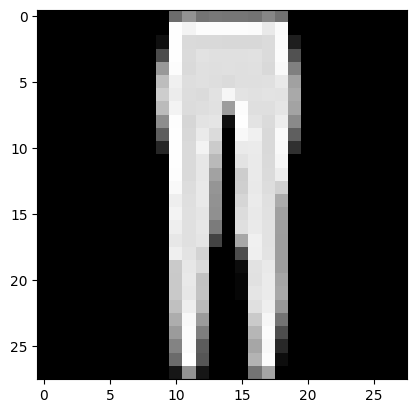

Label: 1


In [9]:
train_features, train_labels = next(iter(train_dataloader))
print(f"Feature batch shape: {train_features.size()}")
print(f"Labels batch shape: {train_labels.size()}")
img = train_features[0].squeeze()
label = train_labels[0]
plt.imshow(img, cmap="gray")
plt.show()
print(f"Label: {label}")